# Simple Models

One rarely wants to just view data or summarize it. This session goes through some example models. We'll be using the `broom`-package later, so let's install it now.

In [107]:
library(tidyverse)
if (!file.exists('rlibs')) {
    dir.create('rlibs')
}
if (!file.exists('rlibs/broom')) {
    install.packages('broom', repos="http://cran.r-project.org", lib='rlibs')
}
library(broom, lib.loc='rlibs')
library(modelr)

## Linear models

Simple linear models are a common starting point for modelling. In R the function `lm` describes a linear model [[lm]](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/lm). The first argument for this function is a `formula` that describes the relationship between the predictors and response.

For example, `y ~ x1 + x2` would mean that `y = a*x1 + b*x2 + c`, whereas `y ~ x1 * x2` would mean that the equation would be similar to `y = a*x1 + b*x2 + c*x1*x2 + d`.

Let's try running a linear model with the `mtcars`-dataset we used previously.

In [108]:
data(mtcars)

mtcars_tbl <- as_tibble(rownames_to_column(mtcars,var='model'))

str(mtcars_tbl)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32 obs. of  12 variables:
 $ model: chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg  : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl  : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp : num  160 160 108 258 360 ...
 $ hp   : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt   : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec : num  16.5 17 18.6 19.4 17 ...
 $ vs   : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am   : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear : num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb : num  4 4 1 1 2 1 4 2 2 4 ...


Previously we plotted `qsec` as a a function of `hp` and plotted a linear fit into it.

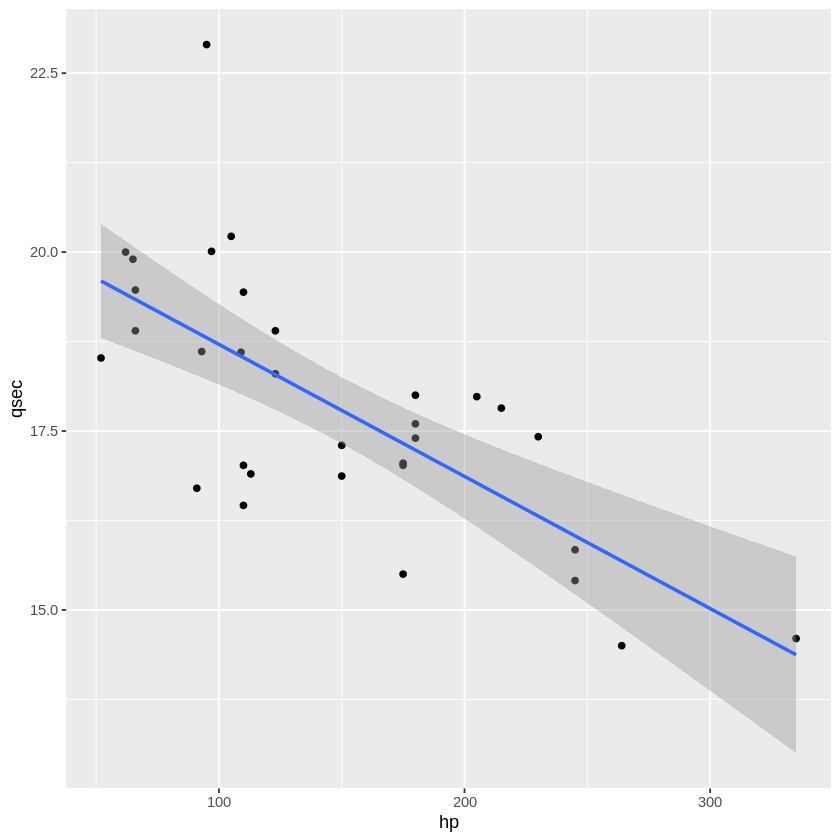

In [109]:
mtcars_tbl %>%
    ggplot(aes(x=hp,y=qsec)) +
    geom_point() +
    geom_smooth(method=lm)

Let's do this now manually. Base-R's function `summary` can be used to view the parameters and a lot of calculated statistics [[summary]](https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/summary).

If you want store the output from multiple models or use the resulting values in your plots, you can use the function `tidy` from `broom` to convert the output into tibbles [[tidy]](https://broom.tidyverse.org/reference/tidy.lm.html) [[broom]](https://broom.tidyverse.org/articles/broom.html).

In [ ]:
cars_model <- lm(qsec ~ hp, data=mtcars_tbl)

summary(cars_model)

tidy(cars_model)

If you want to add these values to the original dataset, you can use `augment` from `broom` or, if you're just interested on predicted values, `add_predictions` from `modelr` [[augment]](https://broom.tidyverse.org/reference/augment.lm.html) [[add_predictions]](https://modelr.tidyverse.org/reference/add_predictions.html).,

In [110]:
cars_model %>%
    augment(mtcars_tbl) %>%
    head()

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,18.52594,0.2580373,-2.0659394,0.04048627,1.244151,0.0570628483,-1.6446119
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,18.52594,0.2580373,-1.5059394,0.04048627,1.272712,0.0303202853,-1.1988183
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,18.83973,0.2896927,-0.2297308,0.05102911,1.303603,0.0009092084,-0.1838926
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,18.52594,0.2580373,0.9140606,0.04048627,1.292777,0.0111703877,0.7276472
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,17.32615,0.2458449,-0.3061490,0.03675069,1.303051,0.0011286688,-0.2432399
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,18.61823,0.2664689,1.6017690,0.04317538,1.268398,0.0367861315,1.2768949


In [111]:
mtcars_modelled <- mtcars_tbl %>%
    add_predictions(cars_model)
head(mtcars_modelled)

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,pred
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,18.52594
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,18.52594
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,18.83973
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,18.52594
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,17.32615
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,18.61823


Let's plot the data:

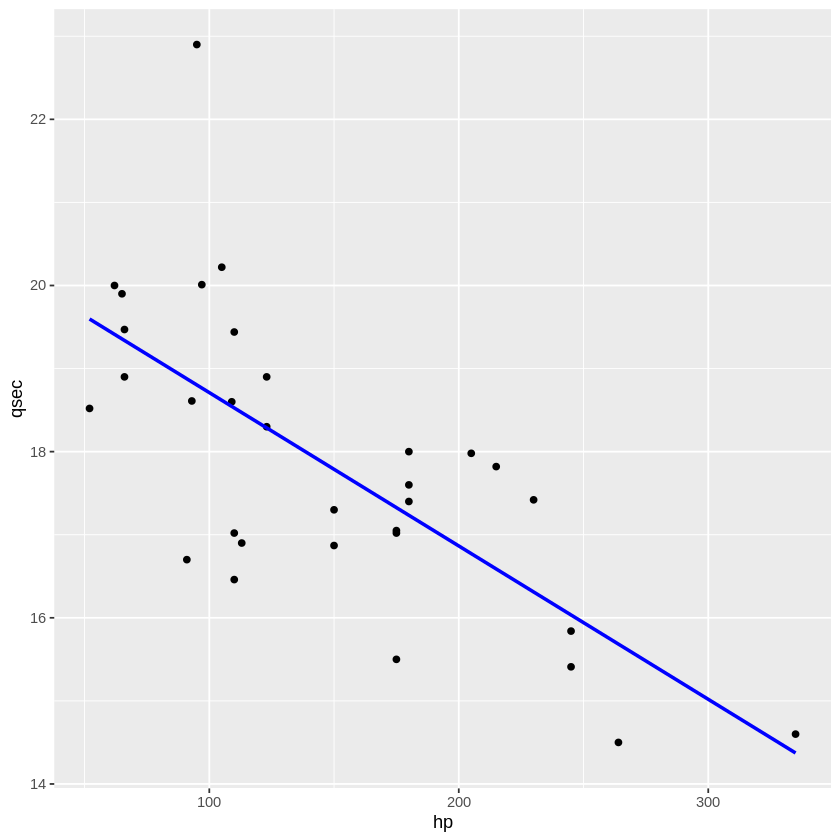

In [112]:
mtcars_modelled %>%
    ggplot(aes(x=hp, y=qsec)) +
        geom_point() +
        geom_line(color='blue', size=1, aes(y=pred))

This plot is missing the confidence intervals. We can get them from `predict` [[predict]](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/predict.lm.html).

In [113]:
cars_model_prediction <- as_tibble(predict(cars_model, newdata=mtcars_modelled, interval = 'confidence', level=0.95))
head(cars_model_prediction)

fit,lwr,upr
<dbl>,<dbl>,<dbl>
18.52594,17.99896,19.05292
18.52594,17.99896,19.05292
18.83973,18.24810,19.43136
18.52594,17.99896,19.05292
17.32615,16.82407,17.82823
18.61823,18.07403,19.16243


`predict` provides the data in a messy format, so adding the upper and lower bounds to our data frame can be a bit messy.

In [114]:
mtcars_modelled <- mtcars_modelled %>%
    add_column(
        lower=cars_model_prediction$lwr,
        upper=cars_model_prediction$upr
    )
head(mtcars_modelled)

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,pred,lower,upper
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,18.52594,17.99896,19.05292
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,18.52594,17.99896,19.05292
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,18.83973,18.24810,19.43136
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,18.52594,17.99896,19.05292
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,17.32615,16.82407,17.82823
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,18.61823,18.07403,19.16243


Now we can add confidence intervals to the plot. This exercise shows how much `ggplot2` does for you.

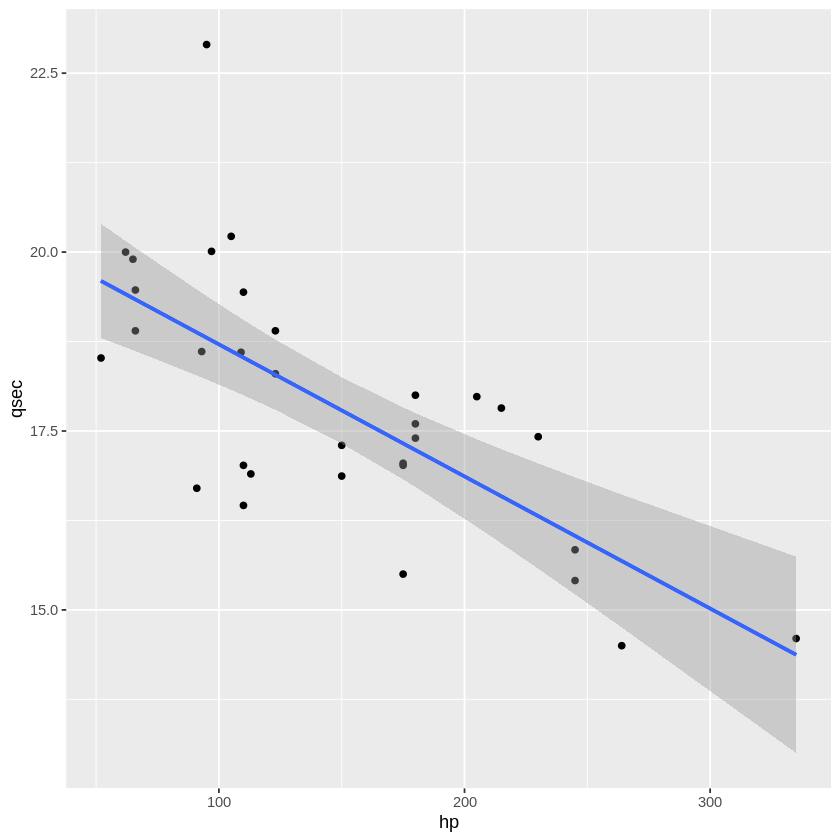

In [115]:
mtcars_modelled %>%
    ggplot(aes(x=hp, y=qsec)) +
        geom_point() +
        geom_line(color='blue', size=1, aes(y=pred)) +
        geom_smooth(aes(y=pred, ymin=lower, ymax=upper), stat='identity')

## Simple clustering

Let's use simple `kmeans`-clustering in the `iris`-dataset [[kmeans]](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/kmeans).

In [119]:
data(iris)

iris_tbl <- as_tibble(iris)

print(iris_tbl)

# A tibble: 150 x 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# … with 140 more rows


In [124]:
clusters <- iris_tbl %>%
    select(-Species) %>%
    kmeans(centers=3)
clusters

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Again, we can `augment` the original dataset.

In [128]:
iris_clusters <- clusters %>%
    augment(iris_tbl)
head(iris_clusters)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,.cluster
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
5.1,3.5,1.4,0.2,setosa,2
4.9,3.0,1.4,0.2,setosa,2
4.7,3.2,1.3,0.2,setosa,2
4.6,3.1,1.5,0.2,setosa,2
5.0,3.6,1.4,0.2,setosa,2
5.4,3.9,1.7,0.4,setosa,2


Let's rename the species levels to match the `.cluster`, so that we can find out how well we succeeded.

In [139]:
iris_clusters <- iris_clusters %>%
    mutate(species_code = fct_recode(Species, "2"="setosa", "3"="virginica", "1"="versicolor"))

In [140]:
iris_clusters %>%
    filter(.cluster != species_code)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,.cluster,species_code
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
6.9,3.1,4.9,1.5,versicolor,3,1
6.7,3.0,5.0,1.7,versicolor,3,1
5.8,2.7,5.1,1.9,virginica,1,3
4.9,2.5,4.5,1.7,virginica,1,3
5.7,2.5,5.0,2.0,virginica,1,3
5.8,2.8,5.1,2.4,virginica,1,3
6.0,2.2,5.0,1.5,virginica,1,3
5.6,2.8,4.9,2.0,virginica,1,3
6.3,2.7,4.9,1.8,virginica,1,3


Let's plot the ones that failed.

In [145]:
iris_clusters <- iris_clusters %>%
    mutate(clustering_failed=.cluster != species_code)

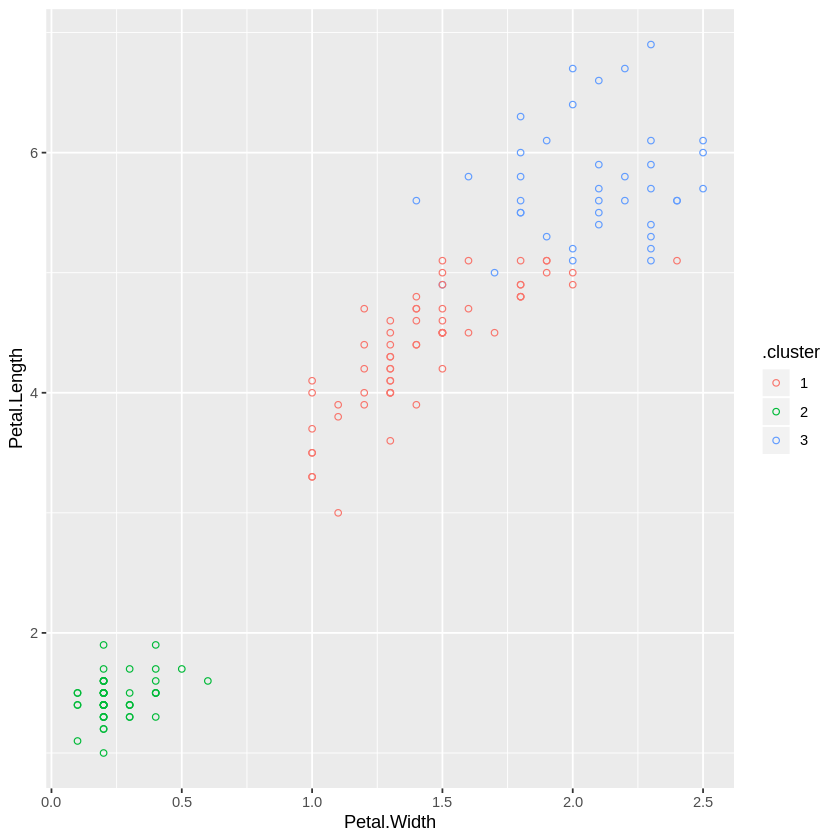

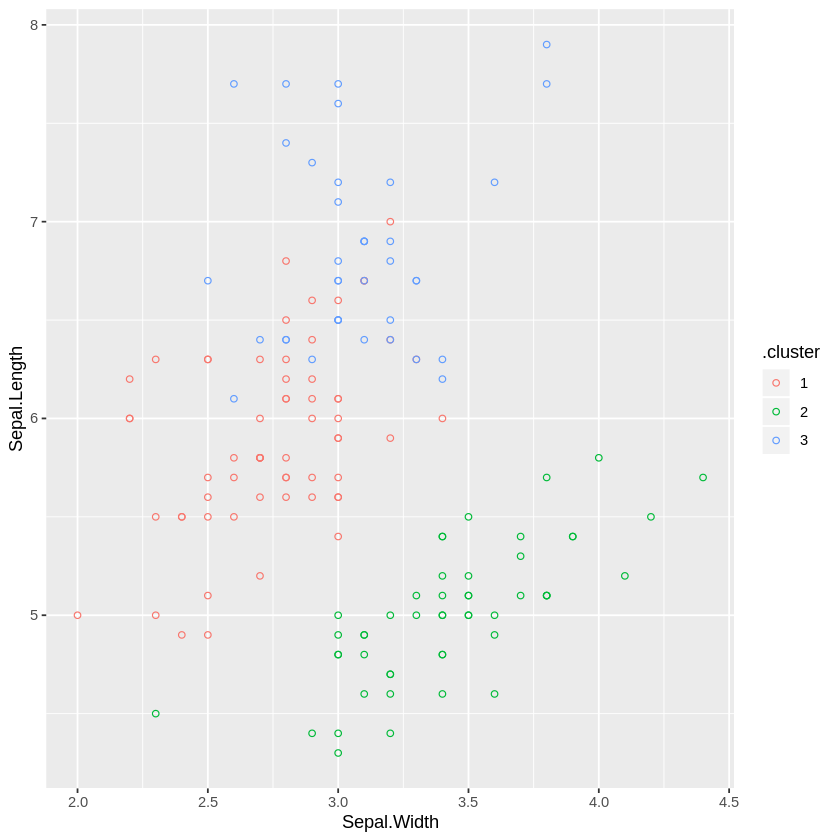

In [146]:
iris_clusters %>%
    ggplot(aes(x=Petal.Width, y=Petal.Length, color=.cluster)) +
        geom_point(shape=1)
iris_clusters %>%
    ggplot(aes(x=Sepal.Width, y=Sepal.Length, color=.cluster)) +
        geom_point(shape=1)

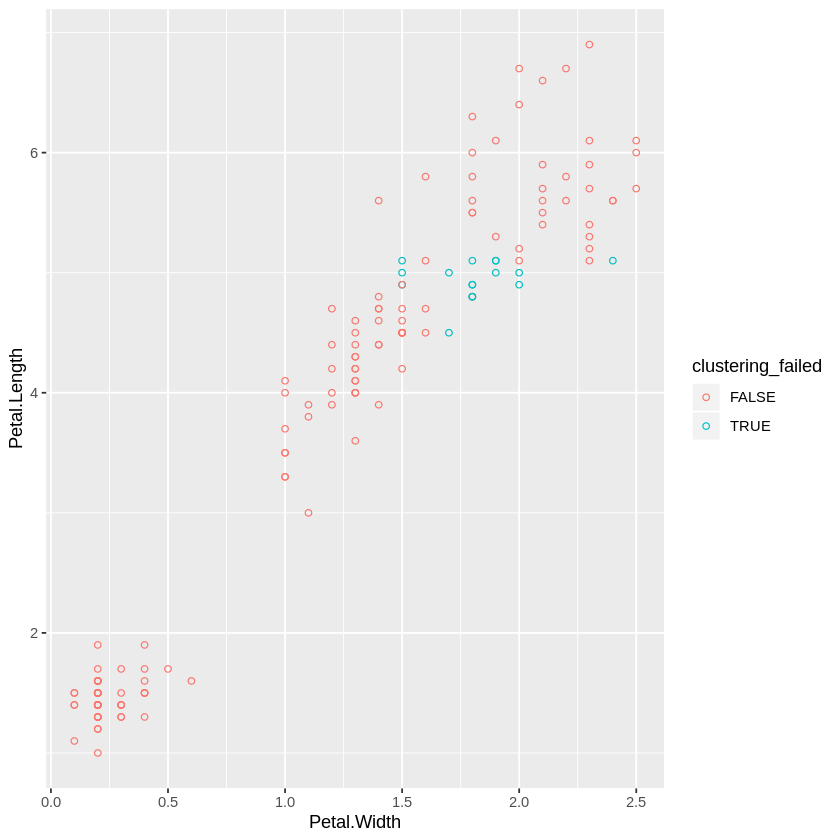

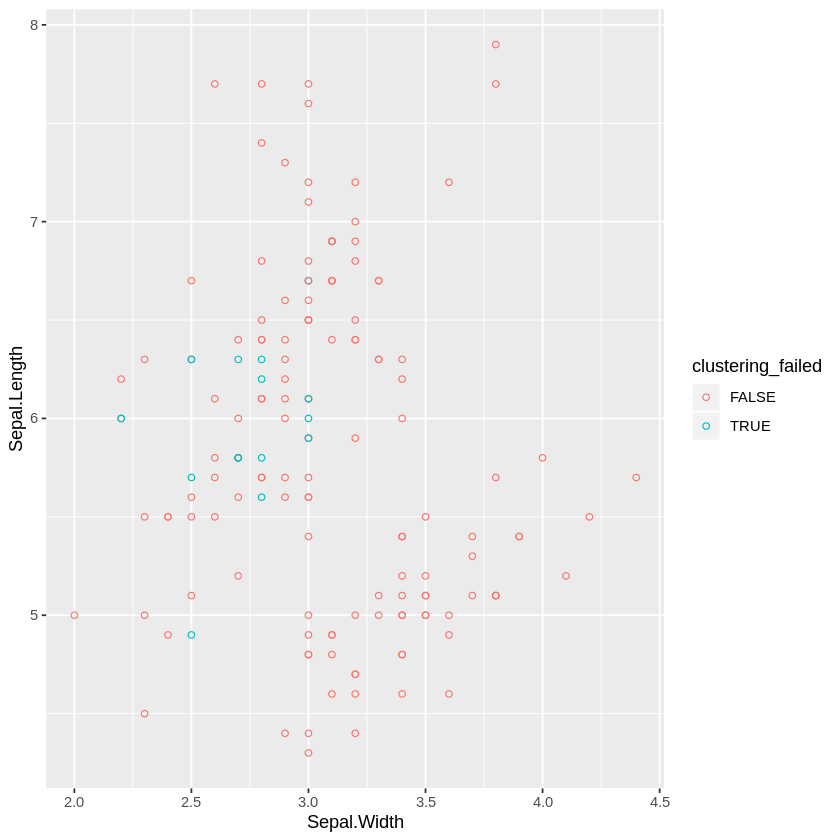

In [147]:
iris_clusters %>%
    ggplot(aes(x=Petal.Width, y=Petal.Length, color=clustering_failed)) +
        geom_point(shape=1)
iris_clusters %>%
    ggplot(aes(x=Sepal.Width, y=Sepal.Length, color=clustering_failed)) +
        geom_point(shape=1)

# Exercises

## 1.

Try to improve on the linear model that we used by adding more predictors. What is the best fit you can obtain?

## 2.

Use the subset of our `beer_recipes`-dataset and the `kmeans`-function to cluster American IPAs and American Light Lagers. Try different predictors and check if some predictors are better at clustering than others [[kmeans]](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/kmeans).

In [185]:
library(tidyverse)
if (!file.exists('rlibs')) {
    dir.create('rlibs')
}
if (!file.exists('rlibs/feather')) {
    install.packages('feather', repos="http://cran.r-project.org", lib='rlibs')
}
library(feather, lib.loc='rlibs')

Sys.setlocale('LC_ALL','C')

beer_recipes <- read_feather('beer_recipes.feather')
beer_recipes <- beer_recipes %>%
    filter(Style == 'American IPA' | Style == 'American Light Lager') %>%
    select(Style:Color, -`Size(L)`) %>%
    mutate_if(is.character, as.factor)

str(beer_recipes)

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

Classes 'tbl_df', 'tbl' and 'data.frame':	14217 obs. of  7 variables:
 $ Style  : Factor w/ 2 levels "American IPA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ StyleID: num  7 7 7 7 7 7 7 7 7 7 ...
 $ OG     : num  1.06 1.06 1.06 1.07 1.07 ...
 $ FG     : num  1.02 1.02 1.01 1.01 1.02 ...
 $ ABV    : num  5.91 5.8 6.63 6.62 7.07 6.51 6.2 7.14 6.5 6.29 ...
 $ IBU    : num  59.2 54.5 64.3 111 69.7 ...
 $ Color  : num  8.98 8.5 7.78 14.26 6.28 ...
